<a href="https://colab.research.google.com/github/asakata0821/Aisa_INFO5731_-Fall2023/blob/main/Sakata_Exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training.

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.

Algorithms:

(1) MultinominalNB

(2) SVM

(3) KNN

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison

(4) F-1 score

In [ ]:
!pip install demoji
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.6 MB/s eta 0:00:00


In [ ]:
#For all models, I use this train dataset

import torch
import pandas as pd
from google.colab import files

# specify GPU
device = torch.device("cuda")
print(device)

#Uploading the train dataset
uploaded = files.upload()
file_name_train = 'stsa-train.txt'

df_train = pd.read_csv(file_name_train, delimiter='\t', header=None)
df_train.columns = ['Text']
texts = df_train['Text']

#Making the additonal column for label
all_texts_train = []
all_labels_train = []

for text in texts:
  if text[0] == '0' or '1':
    first_char = text[0]
    all_labels_train.append(first_char)
    text = text.replace(first_char, '')
    all_texts_train.append(text)

df_train['Text'] = all_texts_train
df_train['Label'] = all_labels_train

train_texts = df_train['Text']
train_labels = df_train['Label']

df_train


cuda


Saving stsa-train.txt to stsa-train (1).txt


Text Label
0      a stirring , funny and finally transporting r...     1
1      apparently reassembled from the cutting-room ...     0
2      they presume their audience wo n't sit still ...     0
3      this is a visually stunning rumination on lov...     1
4      jonathan parker 's bartleby should have been ...     1
...                                                 ...   ...
6915   painful , horrifying and oppressively tragic ...     1
6916   take care is nicely performed by a quintet of...     0
6917   the script covers huge , heavy topics in a bl...     0
6918   a seriously bad film with seriously warped lo...     0
6919   a deliciously nonsensical comedy about a city...     1

[6920 rows x 2 columns]

In [ ]:
#For all models, I use this test dataset

#Uploading the test dataset
uploaded = files.upload()
file_name_test = 'stsa-test.txt'

df_test = pd.read_csv(file_name_test, delimiter='\t', header=None)
df_test.columns = ['Text']
texts = df_test['Text']

#Similarly to the train dataset, making the additonal column for label
all_texts_test = []
all_labels_test = []

for text in texts:
  if text[0] == '0' or '1':
    first_char = text[0]
    all_labels_test.append(first_char)
    text = text.replace(first_char, '')
    all_texts_test.append(text)

df_test['Text'] = all_texts_test
df_test['Label'] = all_labels_test

test_texts = df_test['Text']
test_labels = df_test['Label']

df_test

Saving stsa-test.txt to stsa-test (1).txt


Text Label
0        no movement , no yuks , not much of anything .     0
1      a gob of drivel so sickly sweet , even the ea...     0
2      gangs of new york is an unapologetic mess , w...     0
3      we never really feel involved with the story ...     0
4               this is one of polanski 's best films .     1
...                                                 ...   ...
1816   an often-deadly boring , strange reading of a...     0
1817   the problem with concept films is that if the...     0
1818   safe conduct , however ambitious and well-int...     0
1819   a film made with as little wit , interest , a...     0
1820   but here 's the real damn : it is n't funny ,...     0

[1821 rows x 2 columns]

In [ ]:
#(1) MultinominalNB
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Assuming 'Label' is initially stored as strings
df_train['Label'] = df_train['Label'].astype(int)

# Extract features from text using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train['Text'])
y = df_train['Label']

# Create Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Perform 10-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')

# Create a DataFrame to store the cross-validation results
metrics_df = pd.DataFrame({
    'Model': ['MultinomialNB'],
    'Accuracy': [cv_scores.mean()],
    'Precision': [cross_val_score(clf, X, y, cv=10, scoring='precision').mean()],
    'Recall': [cross_val_score(clf, X, y, cv=10, scoring='recall').mean()],
    'F1 Score': [cross_val_score(clf, X, y, cv=10, scoring='f1').mean()]
})

# Print the metrics DataFrame
print(metrics_df)




           Model  Accuracy  Precision    Recall  F1 Score
0  MultinomialNB  0.791474   0.798984  0.802216  0.800483


In [ ]:
#(2) SVM

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics

# Sample data
# df_train

# Convert 'Label' to numeric values if it's not already done
df_train['Label'] = df_train['Label'].astype(int)

# Extract features from text using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train['Text'])
y = df_train['Label']

# Create Support Vector Machine classifier
svm_classifier = SVC(kernel='linear')

# Perform 10-fold cross-validation
cv_scores_svm = cross_val_score(svm_classifier, X, y, cv=10, scoring='accuracy')

# Create a DataFrame to store the cross-validation results for SVM
metrics_df_svm = pd.DataFrame({
    'Model': ['SVM'],
    'Accuracy': [cv_scores_svm.mean()],
    'Precision': [cross_val_score(svm_classifier, X, y, cv=10, scoring='precision').mean()],
    'Recall': [cross_val_score(svm_classifier, X, y, cv=10, scoring='recall').mean()],
    'F1 Score': [cross_val_score(svm_classifier, X, y, cv=10, scoring='f1').mean()]
})

# Append the metrics for SVM to the existing metrics_df
metrics_df = metrics_df.append(metrics_df_svm, ignore_index=True)

# Print the combined metrics DataFrame
print(metrics_df)



           Model  Accuracy  Precision    Recall  F1 Score
0  MultinomialNB  0.791474   0.798984  0.802216  0.800483
1            SVM  0.768064   0.777557  0.778116  0.777707


<ipython-input-26-664a3831f00c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(metrics_df_svm, ignore_index=True)


In [ ]:
#(3) KNN

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Sample data
# df_train

# Convert 'Label' to numeric values if it's not already done
df_train['Label'] = df_train['Label'].astype(int)

# Extract features from text using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train['Text'])
y = df_train['Label']

# Create k-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors)

# Perform 10-fold cross-validation
cv_scores_knn = cross_val_score(knn_classifier, X, y, cv=10, scoring='accuracy')

# Create a DataFrame to store the cross-validation results for KNN
metrics_df_knn = pd.DataFrame({
    'Model': ['KNN'],
    'Accuracy': [cv_scores_knn.mean()],
    'Precision': [cross_val_score(knn_classifier, X, y, cv=10, scoring='precision').mean()],
    'Recall': [cross_val_score(knn_classifier, X, y, cv=10, scoring='recall').mean()],
    'F1 Score': [cross_val_score(knn_classifier, X, y, cv=10, scoring='f1').mean()]
})

# Append the metrics for KNN to the existing metrics_df
metrics_df = metrics_df.append(metrics_df_knn, ignore_index=True)

# Print the combined metrics DataFrame
print(metrics_df)




           Model  Accuracy  Precision    Recall  F1 Score
0  MultinomialNB  0.791474   0.798984  0.802216  0.800483
1            SVM  0.768064   0.777557  0.778116  0.777707
2            KNN  0.580058   0.605283  0.560665  0.581497


<ipython-input-27-2f52cfa50195>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(metrics_df_knn, ignore_index=True)


In [ ]:
#(4) Decision tree

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Sample data
# df_train

# Convert 'Label' to numeric values if it's not already done
df_train['Label'] = df_train['Label'].astype(int)

# Extract features from text using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train['Text'])
y = df_train['Label']

# Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform 10-fold cross-validation
cv_scores_dt = cross_val_score(dt_classifier, X, y, cv=10, scoring='accuracy')

# Create a DataFrame to store the cross-validation results for Decision Tree
metrics_df_dt = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Accuracy': [cv_scores_dt.mean()],
    'Precision': [cross_val_score(dt_classifier, X, y, cv=10, scoring='precision').mean()],
    'Recall': [cross_val_score(dt_classifier, X, y, cv=10, scoring='recall').mean()],
    'F1 Score': [cross_val_score(dt_classifier, X, y, cv=10, scoring='f1').mean()]
})

# Append the metrics for Decision Tree to the existing metrics_df
metrics_df = metrics_df.append(metrics_df_dt, ignore_index=True)

# Print the combined metrics DataFrame
print(metrics_df)



           Model  Accuracy  Precision    Recall  F1 Score
0  MultinomialNB  0.791474   0.798984  0.802216  0.800483
1            SVM  0.768064   0.777557  0.778116  0.777707
2            KNN  0.580058   0.605283  0.560665  0.581497
3  Decision Tree  0.640751   0.650246  0.669252  0.666491


<ipython-input-28-a3e75fc0cd9f>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(metrics_df_dt, ignore_index=True)


In [ ]:
#(5) Random Forest

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Sample data
# df_train

# Convert 'Label' to numeric values if it's not already done
df_train['Label'] = df_train['Label'].astype(int)

# Extract features from text using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train['Text'])
y = df_train['Label']

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation
cv_scores_rf = cross_val_score(rf_classifier, X, y, cv=10, scoring='accuracy')

# Create a DataFrame to store the cross-validation results for Random Forest
metrics_df_rf = pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy': [cv_scores_rf.mean()],
    'Precision': [cross_val_score(rf_classifier, X, y, cv=10, scoring='precision').mean()],
    'Recall': [cross_val_score(rf_classifier, X, y, cv=10, scoring='recall').mean()],
    'F1 Score': [cross_val_score(rf_classifier, X, y, cv=10, scoring='f1').mean()]
})

# Append the metrics for Random Forest to the existing metrics_df
metrics_df = metrics_df.append(metrics_df_rf, ignore_index=True)

# Print the combined metrics DataFrame
print(metrics_df)



           Model  Accuracy  Precision    Recall  F1 Score
0  MultinomialNB  0.791474   0.798984  0.802216  0.800483
1            SVM  0.768064   0.777557  0.778116  0.777707
2            KNN  0.580058   0.605283  0.560665  0.581497
3  Decision Tree  0.640751   0.650246  0.669252  0.666491
4  Random Forest  0.735116   0.731738  0.777008  0.753553


<ipython-input-29-3400422d229a>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(metrics_df_rf, ignore_index=True)


In [ ]:
#(6) XGBoost

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn import metrics

# Sample data
# df_train

# Convert 'Label' to numeric values if it's not already done
df_train['Label'] = df_train['Label'].astype(int)

# Extract features from text using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train['Text'])
y = df_train['Label']

# Create XGBoost classifier
xgb_classifier = XGBClassifier()

# Perform 10-fold cross-validation
cv_scores_xgb = cross_val_score(xgb_classifier, X, y, cv=10, scoring='accuracy')

# Create a DataFrame to store the cross-validation results for XGBoost
metrics_df_xgb = pd.DataFrame({
    'Model': ['XGBoost'],
    'Accuracy': [cv_scores_xgb.mean()],
    'Precision': [cross_val_score(xgb_classifier, X, y, cv=10, scoring='precision').mean()],
    'Recall': [cross_val_score(xgb_classifier, X, y, cv=10, scoring='recall').mean()],
    'F1 Score': [cross_val_score(xgb_classifier, X, y, cv=10, scoring='f1').mean()]
})

# Append the metrics for XGBoost to the existing metrics_df
metrics_df = metrics_df.append(metrics_df_xgb, ignore_index=True)

# Print the combined metrics DataFrame
print(metrics_df)




           Model  Accuracy  Precision    Recall  F1 Score
0  MultinomialNB  0.791474   0.798984  0.802216  0.800483
1            SVM  0.768064   0.777557  0.778116  0.777707
2            KNN  0.580058   0.605283  0.560665  0.581497
3  Decision Tree  0.640751   0.650246  0.669252  0.666491
4  Random Forest  0.735116   0.731738  0.777008  0.753553
5        XGBoost  0.728179   0.718732  0.787258  0.751116


<ipython-input-30-c0783357a9c6>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(metrics_df_xgb, ignore_index=True)


In [ ]:
#(7) Word2Vec

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

# Sample data
# df_train

# Download the NLTK resource
nltk.download('punkt')

# Split the data into training and testing sets
train_df, test_df = train_test_split(df_train, test_size=0.2, random_state=42)

# Tokenize the text data
train_tokenized = train_df['Text'].apply(word_tokenize)
test_tokenized = test_df['Text'].apply(word_tokenize)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=train_tokenized, vector_size=100, window=5, min_count=1, workers=4)

# Function to create document vectors
def get_doc_vector(model, tokens):
    vector = [model.wv[word] for word in tokens if word in model.wv.index_to_key]
    return sum(vector) / len(vector) if vector else [0] * model.vector_size

# Create document vectors for training and testing sets
X_train = train_tokenized.apply(lambda x: get_doc_vector(word2vec_model, x)).to_list()
X_test = test_tokenized.apply(lambda x: get_doc_vector(word2vec_model, x)).to_list()

# Convert lists of vectors to DataFrame
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Convert 'Label' to numeric values if it's not already done
train_df['Label'] = train_df['Label'].astype(int)
test_df['Label'] = test_df['Label'].astype(int)

# Create Logistic Regression classifier
lr_classifier = LogisticRegression()

# Train the classifier
lr_classifier.fit(X_train, train_df['Label'])

# Make predictions on the test set
lr_predictions = lr_classifier.predict(X_test)

# Evaluate the performance
lr_accuracy = accuracy_score(test_df['Label'], lr_predictions)
lr_precision = precision_score(test_df['Label'], lr_predictions)
lr_recall = recall_score(test_df['Label'], lr_predictions)
lr_f1 = f1_score(test_df['Label'], lr_predictions)

# Perform 10-fold cross-validation
cv_scores_lr = cross_val_score(lr_classifier, pd.concat([X_train, X_test]), pd.concat([train_df['Label'], test_df['Label']]), cv=10, scoring='accuracy')

# Create a DataFrame to store the cross-validation results for Word2Vec
metrics_df_lr = pd.DataFrame({
    'Model': ['Word2Vec'],
    'Accuracy': [cv_scores_lr.mean()],
    'Precision': [cross_val_score(lr_classifier, pd.concat([X_train, X_test]), pd.concat([train_df['Label'], test_df['Label']]), cv=10, scoring='precision').mean()],
    'Recall': [cross_val_score(lr_classifier, pd.concat([X_train, X_test]), pd.concat([train_df['Label'], test_df['Label']]), cv=10, scoring='recall').mean()],
    'F1 Score': [cross_val_score(lr_classifier, pd.concat([X_train, X_test]), pd.concat([train_df['Label'], test_df['Label']]), cv=10, scoring='f1').mean()]
})

# Append the metrics for Word2Vec to the existing metrics_df
metrics_df = metrics_df.append(metrics_df_lr, ignore_index=True)

# Print the combined metrics DataFrame
print(metrics_df)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


           Model  Accuracy  Precision    Recall  F1 Score
0  MultinomialNB  0.791474   0.798984  0.802216  0.800483
1            SVM  0.768064   0.777557  0.778116  0.777707
2            KNN  0.580058   0.605283  0.560665  0.581497
3  Decision Tree  0.640751   0.650246  0.669252  0.666491
4  Random Forest  0.735116   0.731738  0.777008  0.753553
5        XGBoost  0.728179   0.718732  0.787258  0.751116
6       Word2Vec  0.573844   0.566811  0.776731  0.655297


<ipython-input-31-43b6a6915f1f>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(metrics_df_lr, ignore_index=True)


In [ ]:
#(8) BERT
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
import torch

# Assuming 'Label' is initially stored as strings
df_train['Label'] = df_train['Label'].astype(int)

# Split the data into features and labels
X_texts = df_train['Text']
y_labels = df_train['Label']

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Assuming binary classification, adjust num_labels accordingly

# Initialize 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize metrics storage
cv_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Iterate through folds
for train_index, test_index in cv.split(X_texts, y_labels):
    X_train, X_test = X_texts.iloc[train_index], X_texts.iloc[test_index]
    y_train, y_test = y_labels.iloc[train_index], y_labels.iloc[test_index]

    # Tokenize the text data
    train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128, return_tensors='pt')
    test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128, return_tensors='pt')

    # Convert labels to PyTorch tensors
    y_train_tensor = torch.tensor(y_train.values.astype(int))
    y_test_tensor = torch.tensor(y_test.values.astype(int))

    # Create DataLoader for training and testing sets
    train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], y_train_tensor)
    test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], y_test_tensor)

    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

    # Set device to GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Define optimizer and loss function
    optimizer = AdamW(model.parameters(), lr=5e-5)
    loss_fn = torch.nn.CrossEntropyLoss()

    # Training loop
    num_epochs = 3
    for epoch in range(num_epochs):
        model.train()
        for batch in train_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

    # Evaluation
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1)

            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Convert predictions and labels to NumPy arrays
    predictions_array = np.array(all_predictions)
    labels_array = np.array(all_labels)

    # Calculate metrics
    accuracy = accuracy_score(labels_array, predictions_array)
    precision = precision_score(labels_array, predictions_array)
    recall = recall_score(labels_array, predictions_array)
    f1 = f1_score(labels_array, predictions_array)

    # Append metrics to the storage
    cv_metrics['Model'].append('BERT')
    cv_metrics['Accuracy'].append(accuracy)
    cv_metrics['Precision'].append(precision)
    cv_metrics['Recall'].append(recall)
    cv_metrics['F1 Score'].append(f1)

# Create a DataFrame to store the cross-validation results for BERT
cv_metrics_df_bert = pd.DataFrame(cv_metrics)

# Append the metrics for BERT to the existing metrics_df
metrics_df = metrics_df.append(cv_metrics_df_bert.mean(), ignore_index=True)

# Print the combined metrics DataFrame
print(metrics_df)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: 

           Model  Accuracy  Precision    Recall  F1 Score
0  MultinomialNB  0.791474   0.798984  0.802216  0.800483
1            SVM  0.768064   0.777557  0.778116  0.777707
2            KNN  0.580058   0.605283  0.560665  0.581497
3  Decision Tree  0.640751   0.650246  0.669252  0.666491
4  Random Forest  0.735116   0.731738  0.777008  0.753553
5        XGBoost  0.728179   0.718732  0.787258  0.751116
6       Word2Vec  0.573844   0.566811  0.776731  0.655297
7            NaN  0.877457   0.826040  0.881440  0.846296


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-34-d0a73711bf76>:106: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metrics_df = metrics_df.append(cv_metrics_df_bert.mean(), ignore_index=True)
<ipython-input-34-d0a73711bf76>:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(cv_metrics_df_bert.mean(), ignore_index=True)


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [2]:
import pandas as pd

amazon_df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
amazon_df.dropna(subset=['Reviews'], inplace=True)
amazon_df

Product Name Brand Name   Price  \
0       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
...                                                   ...        ...     ...   
413835  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413836  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413837  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413838  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413839  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   

        Rating                                            Reviews  \
0            5  I feel so LUCKY to have found this used (phone...   
1            4  nice phone, nice up grade from my pantach revu...   
2            5                                       Very pleased   
3            4  It works good but it goes slow sometimes but i...   
4            4  Great phone to replace my lost phone. The only...   
...        ...                                                ...   
413835       5                     another great deal great price   
413836       3                                                 Ok   
413837       5        Passes every drop test onto porcelain tile!   
413838       3  I returned it because it did not meet my needs...   
413839       4  Only downside is that apparently Verizon no lo...   

        Review Votes  
0                1.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
413835           0.0  
413836           0.0  
413837           0.0  
413838           0.0  
413839           0.0  

[413778 rows x 6 columns]

In [4]:
def label_rating(x):
    if x == 5:
        return 'Great'
    elif x == 4:
        return 'Good'
    elif x == 3:
        return 'Average'
    elif x == 2:
        return 'Not Good'
    return 'Bad'

#Labeling ratings (1 to 5)
actualScore = amazon_df['Rating']
rating_label = actualScore.map(label_rating)
amazon_df['Rating'] = rating_label

amazon_df

Product Name Brand Name   Price  \
0       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
...                                                   ...        ...     ...   
413835  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413836  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413837  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413838  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413839  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   

         Rating                                            Reviews  \
0         Great  I feel so LUCKY to have found this used (phone...   
1          Good  nice phone, nice up grade from my pantach revu...   
2         Great                                       Very pleased   
3          Good  It works good but it goes slow sometimes but i...   
4          Good  Great phone to replace my lost phone. The only...   
...         ...                                                ...   
413835    Great                     another great deal great price   
413836  Average                                                 Ok   
413837    Great        Passes every drop test onto porcelain tile!   
413838  Average  I returned it because it did not meet my needs...   
413839     Good  Only downside is that apparently Verizon no lo...   

        Review Votes  
0                1.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
413835           0.0  
413836           0.0  
413837           0.0  
413838           0.0  
413839           0.0  

[413778 rows x 6 columns]

In [5]:
amazon_df['Rating'].value_counts()

Great       223580
Bad          72337
Good         61374
Average      31763
Not Good     24724
Name: Rating, dtype: int64

In [6]:
#Removing duplicated reviews
subset_columns = ["Product Name", "Brand Name", "Price", "Rating", "Reviews", "Review Votes"]
final = amazon_df.drop_duplicates(subset=subset_columns, keep='first', inplace=False)
final.shape


(349710, 6)

In [7]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer which is developed in recent years
stop_words = set(stopwords.words('english'))
import demoji
import string

def clean_text(text):
    # Split the text into words
    words = text.split()

    # Remove words starting with '@'
    cleaned_words = [word for word in words if not word.startswith('@')]

    # Remove hyperlinks (e.g., http://example.com)
    cleaned_words = [word for word in cleaned_words if not word.startswith('http')]

    # Convert to lowercase
    text = ' '.join(cleaned_words).lower()

    # Remove emojis
    text = demoji.replace(text, '')

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = ''.join(i for i in text if not i.isdigit())

    # Remove stopwords
    text = ' '.join(i for i in text.split() if i not in stop_words)

    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
#K-means
cleaned_review = []

for index, row in final.iterrows():
    review = clean_text(row['Reviews'])
    cleaned_review.append(review)
    #print(review)

final['Cleaned Reviews'] = cleaned_review

<ipython-input-41-7da326e56216>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Cleaned Reviews'] = cleaned_review


In [42]:
# Generating bag of words
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(final['Cleaned Reviews'].values)
bow.shape

(349710, 115587)

In [43]:
#Printing the first 10 bows
terms = count_vect.get_feature_names_out()
terms[1:10]

array(['aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaa',
       'aaaaaaaaa', 'aaaaaaaaaaa', 'aaaaaaaaaaaaaa'], dtype=object)

In [44]:
from sklearn.cluster import KMeans
kmean_model = KMeans(n_clusters=10, random_state=42)
kmean_model.fit(bow)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [45]:
labels = kmean_model.labels_
cluster_center=kmean_model.cluster_centers_
cluster_center

array([[5.89776643e-05, 1.68507612e-05, 8.42538062e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.66748166e-03, 1.22249389e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.33832976e-03, 1.33832976e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.59440559e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [46]:
#Labeling clusters
amazon_df = final
amazon_df['Bow Clus Label'] = kmean_model.labels_
amazon_df.head(10)

<ipython-input-46-d1e254d99400>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_df['Bow Clus Label'] = kmean_model.labels_ # the last column you can see the label numebers


Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
5  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
6  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
7  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
8  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
9  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

     Rating                                            Reviews  Review Votes  \
0     Great  I feel so LUCKY to have found this used (phone...           1.0   
1      Good  nice phone, nice up grade from my pantach revu...           0.0   
2     Great                                       Very pleased           0.0   
3      Good  It works good but it goes slow sometimes but i...           0.0   
4      Good  Great phone to replace my lost phone. The only...           0.0   
5       Bad  I already had a phone with problems... I know ...           1.0   
6  Not Good  The charging port was loose. I got that solder...           0.0   
7  Not Good  Phone looks good but wouldn't stay charged, ha...           0.0   
8     Great  I originally was using the Samsung S2 Galaxy f...           0.0   
9   Average  It's battery life is great. It's very responsi...           0.0   

                                     Cleaned Reviews  Bow Clus Label  
0  feel lucky found used phone us used hard phone...               4  
1  nice phone nice grade pantach revue clean set ...               4  
2                                            pleased               5  
3     works good goes slow sometimes good phone love               0  
4  great phone replace lost phone thing volume bu...               4  
5  already phone problems know stated used dang s...               0  
6  charging port loose got soldered needed new ba...               0  
7  phone looks good wouldnt stay charged buy new ...               0  
8  originally using samsung galaxy sprint wanted ...               7  
9  battery life great responsive touch issue some...               5

In [47]:
#Points of each cluster
amazon_df.groupby(['Bow Clus Label'])['Reviews'].count()

Bow Clus Label
0    118688
1       818
2      7472
3      3845
4     36804
5    171144
6        28
7     10725
8        62
9       124
Name: Reviews, dtype: int64

In [48]:
#Find the top 10 features of cluster centroid
print("Top terms per cluster:")
order_centroids = kmean_model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names_out()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()


Top terms per cluster:
Cluster 0: phone great good love works like one use new battery
Cluster 1: phone screen like one use get battery phones good would
Cluster 2: phone screen one like use battery good great get camera
Cluster 3: phone screen like one use battery get good would phones
Cluster 4: phone great one good would like use battery screen new
Cluster 5: good great product works love excellent like one work new
Cluster 6: apple iphone android samsung even gb know phones also one
Cluster 7: phone one would great use get screen like good new
Cluster 8: watch phone like get app bt one music card able
Cluster 9: phone screen battery use apps android like one camera app


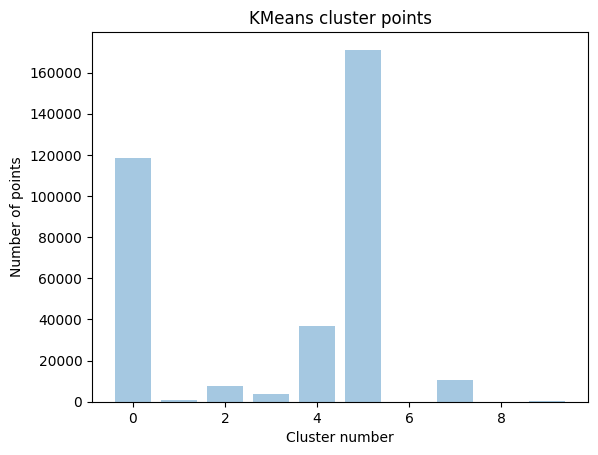

In [49]:
import matplotlib.pyplot as plt

#Creating a visualization to see points across 10 clusters
plt.bar([x for x in range(10)], amazon_df.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [50]:
#Printing one review for each group
for i in range(10):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(amazon_df.iloc[amazon_df.groupby(['Bow Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
It works good but it goes slow sometimes but its a very good phone I love it


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
Perfect


______________________________________________________________________
A review of assigned to cluster  2
----------------------------------------------------------------------
Freezes alot. But i bought primarily for playing back my music instead of my BB. Its a great phone for SMS and rings really loud. The body is strong and neat


______________________________________________________________________
A review of assigned to cluster  3
----------------------------------------------------------------------
muy buen producto


______________________________________________________________________
A review of assigned to

In [51]:
#Creating the original text corpus
list_of_sent=[]
for sent in final['Cleaned Reviews'].values:
    list_of_sent.append(sent.split())

print(final['Cleaned Reviews'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

feel lucky found used phone us used hard phone line someone upgraded sold one son liked old one finally fell apart years didnt want upgrade thank seller really appreciate honesty said used phonei recommend seller highly would
*****************************************************************
['feel', 'lucky', 'found', 'used', 'phone', 'us', 'used', 'hard', 'phone', 'line', 'someone', 'upgraded', 'sold', 'one', 'son', 'liked', 'old', 'one', 'finally', 'fell', 'apart', 'years', 'didnt', 'want', 'upgrade', 'thank', 'seller', 'really', 'appreciate', 'honesty', 'said', 'used', 'phonei', 'recommend', 'seller', 'highly', 'would']


In [52]:
#Preprocessing texts for creating the original text corpus for training
import re
def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

list_of_sent_train=[]
for sent in final['Reviews'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue
    list_of_sent_train.append(filtered_sentence)

In [53]:
import gensim
import numpy as np

# Training the word2vec model using the original text corpus
w2v_model = gensim.models.Word2Vec(list_of_sent_train, vector_size=100, workers=4)

sent_vectors = []

for sent in list_of_sent_train:
    sent_vec = np.zeros(100)
    cnt_words = 0

    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except KeyError:
            pass

    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

<ipython-input-53-15f8b4ae8a7a>:21: RuntimeWarning: invalid value encountered in divide
  sent_vec /= cnt_words


(349710, 100)

In [54]:
#DBSCAN

from sklearn.cluster import DBSCAN

#As a sample, computing 200th nearest neighbour distance
minPts = 2 * 100

#Calculating the lower bound
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def calculate_distance(x, data):
    dists = []
    for val in data:
        #Computing distances
        dist = np.sum((x - val) **2 )

        if(len(dists) == 200 and dists[199] > dist):

            #Using the lower_bound func to get the right position
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

    return dists[199]

In [55]:
#Calculating the distance
distance_list = []
for val in sent_vectors[:1500]:
    distance_list.append(calculate_distance(val, sent_vectors[:1500]) )
distance_list.sort()

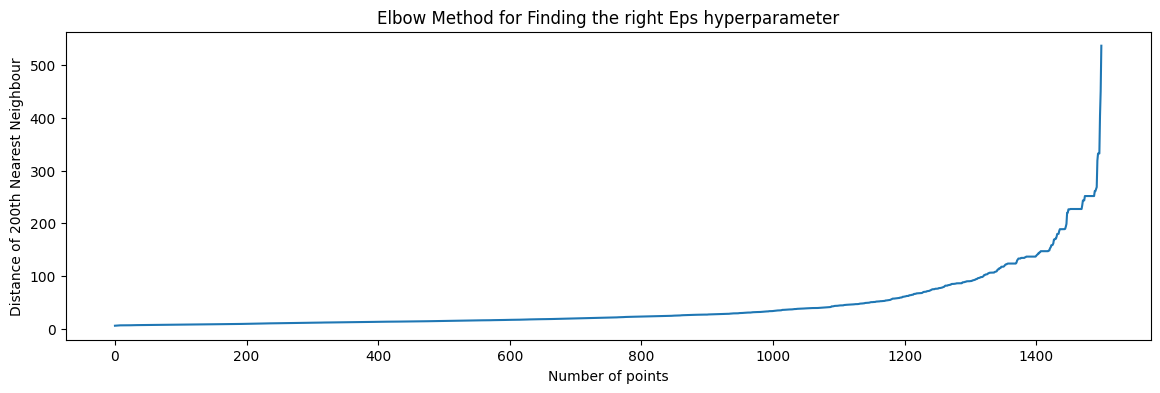

In [56]:
#For the Elbow Method
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(distance_list))], distance_list)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

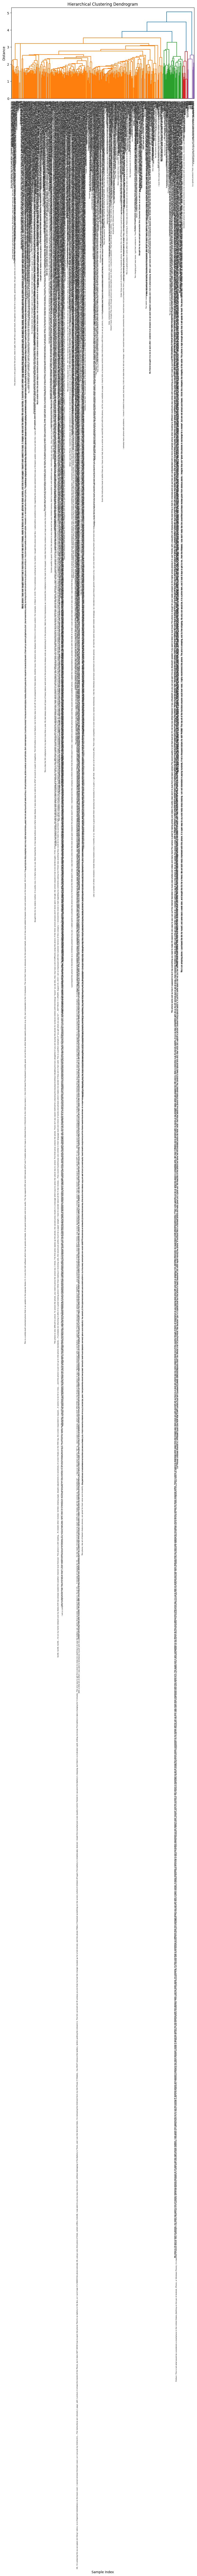

Cluster 1: ["I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!", 'nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung', 'Very pleased', 'Great phone to replace my lost phone. The only thing is the volume up button does not work, but I can still go into settings to adjust. Other than that, it does the job until I am eligible to upgrade my phone again.Thaanks!', 'I already had a phone with problems... I know it stated it was used, but dang, it did not state that it did not charge. I wish I would have read the

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [23]:
#Hierarchical clustering
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

#Because the original column is too big and the system can crash
reviews = amazon_df['Reviews'][:500].tolist()

#Transforming texts to TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(reviews)

#Calculating the cosine similarity
cosine_similarities = cosine_similarity(X)

#Applying hierarchical clustering
linkage_matrix = linkage(1 - cosine_similarities, method='complete')

#Creating a dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=reviews, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

num_clusters = 10
labels = AgglomerativeClustering(n_clusters=num_clusters, affinity='cosine', linkage='complete').fit_predict(1 - cosine_similarities)

#Printing the clusters
for cluster_id in range(num_clusters):
    cluster_indices = np.where(labels == cluster_id)[0]
    cluster_reviews = [reviews[i] for i in cluster_indices]
    print(f"Cluster {cluster_id + 1}: {cluster_reviews}")


In [40]:
#Word2Vec
import re
import gensim
import numpy as np
from sklearn.cluster import KMeans

#Preprocessing texts for creatinf original text corpus
def remove_html(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def remove_punctuation(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

list_of_sent_train=[]
for sent in final['Reviews'].values:
    filtered_sentence=[]
    sent=remove_html(sent)
    for w in sent.split():
        for cleaned_words in remove_punctuation(w).split():
            if(cleaned_words.isalpha()):
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue
    list_of_sent_train.append(filtered_sentence)

#Because the original column is too big and the system can crash
reviews = amazon_df['Reviews'][:500].tolist()

#Loading Word2Vec model
w2v_model = gensim.models.Word2Vec(list_of_sent_train, vector_size=100, workers=4)

#Preprocessing texts for embedding this time
def preprocess_text(text):
    #Lowercasing
    text = text.lower()

    #Removing stopwords
    stop_words = set(stopwords.words('english'))
    text_words = [word for word in text.split() if word not in stop_words]

    #Converting texts to word embeddings
    word_embeddings = []
    for word in text_words:
        try:
            word_embedding = w2v_model.wv[word]
        except KeyError:
            word_embedding = np.zeros(w2v_model.vector_size)
        word_embeddings.append(word_embedding)

    #Calculating the average of word embedding
    document_embedding = np.mean(word_embeddings, axis=0)

    return document_embedding

#Running the preprocess func and collect embedded texts
document_embeddings = []
for review in reviews:
    document_embedding = preprocess_text(review)
    document_embeddings.append(document_embedding)

#Making K-means clustering
kmeans = KMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(document_embeddings)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Creating a dataframe for Word2Vec results
w2v_df = pd.DataFrame({
    'Word2Vec_X': [emb[0] for emb in document_embeddings],
    'Word2Vec_Y': [emb[1] for emb in document_embeddings],
    'Cluster': cluster_labels
})

#Creating a visualization
if w2v_model.vector_size == 2:
    plt.figure(figsize=(10, 6))
    for cluster_id in range(kmeans.n_clusters):
        cluster_points = w2v_df[w2v_df['Cluster'] == cluster_id]
        plt.scatter(cluster_points['Word2Vec_X'], cluster_points['Word2Vec_Y'], label=f'Cluster {cluster_id}')

    plt.title('K-means Clustering with Word2Vec Embeddings')
    plt.xlabel('Word2Vec Dimension 1')
    plt.ylabel('Word2Vec Dimension 2')
    plt.legend()
    plt.show()
else:
    print("Skipping 2D visualization as vector size is not 2.")

# You can also print and analyze cluster centroids if needed
print("Cluster Centroids:")
print(kmeans.cluster_centers_)


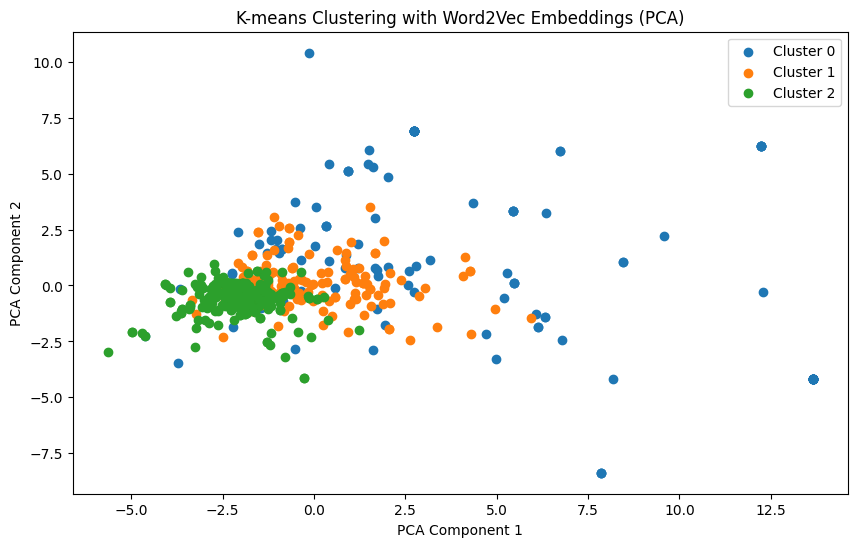

In [38]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
w2v_pca = pca.fit_transform(document_embeddings)

# Add the PCA components to the DataFrame
w2v_df['PCA_1'] = w2v_pca[:, 0]
w2v_df['PCA_2'] = w2v_pca[:, 1]

# Visualize clusters in 2D space
plt.figure(figsize=(10, 6))
for cluster_id in range(kmeans.n_clusters):
    cluster_points = w2v_df[w2v_df['Cluster'] == cluster_id]
    plt.scatter(cluster_points['PCA_1'], cluster_points['PCA_2'], label=f'Cluster {cluster_id}')

plt.title('K-means Clustering with Word2Vec Embeddings (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [17]:
!pip install sentence-transformers

  Using cached sentence_transformers-2.2.2-py3-none-any.whl


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


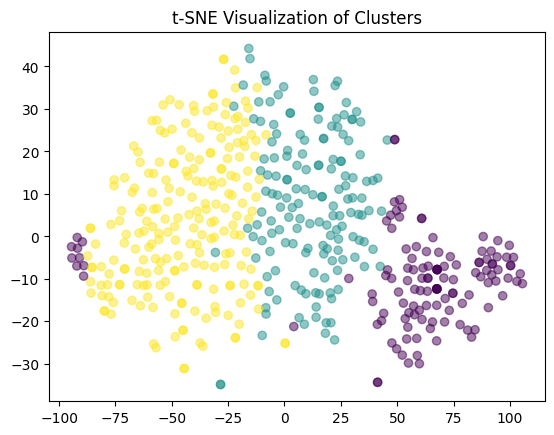

In [32]:
#BERT
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

#Loading the BERT model
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

#Because the original column is too big and the system can crash
reviews = amazon_df['Reviews'][:500].tolist()

#Embedding texts for machine readable formats
embedded_reviews = bert_model.encode(reviews)

#K-means clustering
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(embedded_reviews)

#For a visualization
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embedded_reviews)

#Creating a scatter plot
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization of Clusters')
plt.show()


In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

In [ ]:
'''''
This time, I tried five methods for text clustering. To be honest, BERT was much easier to run because of its pretraining.
I only needed a few lines to see the results, while other models caused Google Colab to crash or required a large memory footprint.
For some models, I had to try again and again, which took up a considerable amount of time. However, not considering those
time-consuming processes, personally, I prefer hierarchical clustering. The reason is that it's very clear to see the results with relationships
between each cluster, using size, colors, and its hierarchical structure. It allows clusters to be nested as well.
